In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
phishing_ds = pd.read_csv("phishing_url.csv")
df = pd.read_csv("phishing_url.csv")

In [3]:
df

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.000000,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.000000,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.000000,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.000000,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.000000,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0


# Data preprocessing

In [5]:
df.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
URLLength,235795.0,34.573095,41.314153,13.000000,23.000000,27.000000,34.000000,6.097000e+03
DomainLength,235795.0,21.470396,9.150793,4.000000,16.000000,20.000000,24.000000,1.100000e+02
IsDomainIP,235795.0,0.002706,0.051946,0.000000,0.000000,0.000000,0.000000,1.000000e+00
URLSimilarityIndex,235795.0,78.430778,28.976055,0.155574,57.024793,100.000000,100.000000,1.000000e+02
CharContinuationRate,235795.0,0.845508,0.216632,0.000000,0.680000,1.000000,1.000000,1.000000e+00
TLDLegitimateProb,235795.0,0.260423,0.251628,0.000000,0.005977,0.079963,0.522907,5.229071e-01
URLCharProb,235795.0,0.055747,0.010587,0.001083,0.050747,0.057970,0.062875,9.082366e-02
TLDLength,235795.0,2.764456,0.599739,2.000000,2.000000,3.000000,3.000000,1.300000e+01
NoOfSubDomain,235795.0,1.164758,0.600969,0.000000,1.000000,1.000000,1.000000,1.000000e+01
HasObfuscation,235795.0,0.002057,0.045306,0.000000,0.000000,0.000000,0.000000,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [8]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [9]:
# Removing FILENAME, URL, and Domain as they do not contribute to predictive modeling.
df = df.drop(columns=["FILENAME", "URL", "Domain"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  object 
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

In [11]:
# Label Encoding of the columns Title and TLD
from sklearn.preprocessing import LabelEncoder

In [12]:
label_encoder = LabelEncoder()

In [13]:
df["TLD"] = label_encoder.fit_transform(df["TLD"])
df["Title"] = label_encoder.fit_transform(df["Title"])

In [14]:
df["TLD"]

0         231
1         254
2         647
3         231
4         503
         ... 
235790    231
235791    647
235792    157
235793    258
235794    231
Name: TLD, Length: 235795, dtype: int32

In [15]:
df["Title"]

0         197871
1          93363
2         187338
3          81289
4          69782
           ...  
235790    160270
235791    191644
235792    126238
235793    134912
235794      9826
Name: Title, Length: 235795, dtype: int32

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  int32  
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

In [17]:
#normalization of the features - URLSimilarityIndex, LetterRatioInURL, ObfuscationRatio

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
features_to_scale = [
    "URLLength", "DomainLength", "NoOfSubDomain", "LargestLineLength",
    "LetterRatioInURL", "NoOfLettersInURL", "NoOfDegitsInURL", "NoOfOtherSpecialCharsInURL",
    "URLSimilarityIndex", "ObfuscationRatio", "NoOfObfuscatedChar",
    "LineOfCode", "DomainTitleMatchScore"
]

In [21]:
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [22]:
df

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,-0.086486,0.276436,0,231,0.744382,1.000000,0.522907,0.061933,3,-0.274154,...,0,0,1,34,20,28,119,0,124,1
1,-0.280125,-0.597807,0,254,0.744382,0.666667,0.032650,0.050207,2,-0.274154,...,0,0,1,50,9,8,39,0,217,1
2,-0.134896,0.057875,0,647,0.744382,0.866667,0.028555,0.064129,2,1.389828,...,0,0,1,10,2,7,42,2,5,1
3,-0.207510,-0.269966,0,231,0.744382,1.000000,0.522907,0.057606,3,-0.274154,...,1,1,1,3,27,15,22,1,31,1
4,-0.038077,0.494997,0,503,0.744382,1.000000,0.079963,0.059441,3,-0.274154,...,1,0,1,244,15,34,72,1,85,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235790,-0.134896,0.057875,0,231,0.744382,1.000000,0.522907,0.058739,3,-0.274154,...,1,0,1,51,7,21,187,2,191,1
235791,-0.159101,-0.051405,0,647,0.744382,0.785714,0.028555,0.053834,2,1.389828,...,1,0,0,50,1,7,88,0,31,1
235792,-0.110691,0.167156,0,157,0.744382,1.000000,0.003319,0.063093,2,-0.274154,...,0,0,1,27,10,30,58,2,67,1
235793,0.494430,2.789885,0,258,-1.734996,0.465116,0.000961,0.050211,3,1.389828,...,0,0,0,0,0,3,0,0,0,0


# visualization

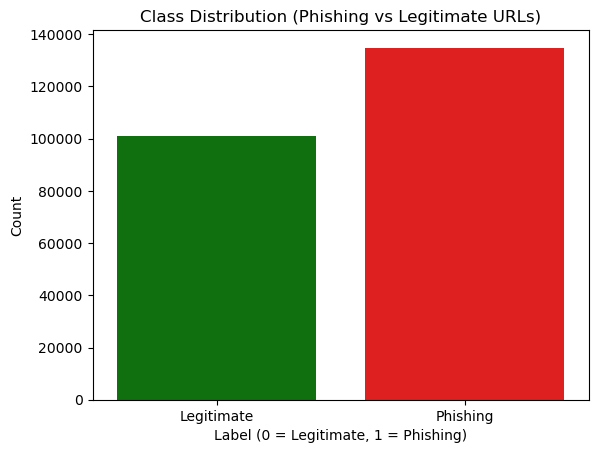

In [24]:
# class distribution (Phishing vs. Legitimate)
sns.countplot(x=df["label"], palette=["green", "red"])
plt.title("Class Distribution (Phishing vs Legitimate URLs)")
plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Legitimate", "Phishing"])
plt.show()

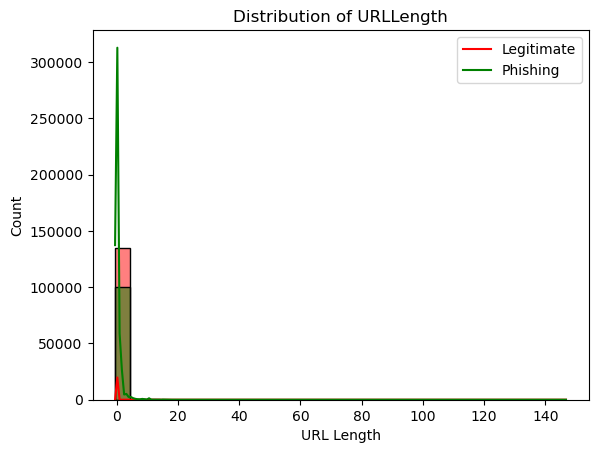

In [25]:
sns.histplot(data=df, x="URLLength", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"URLLength"}")
plt.xlabel("URL Length")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

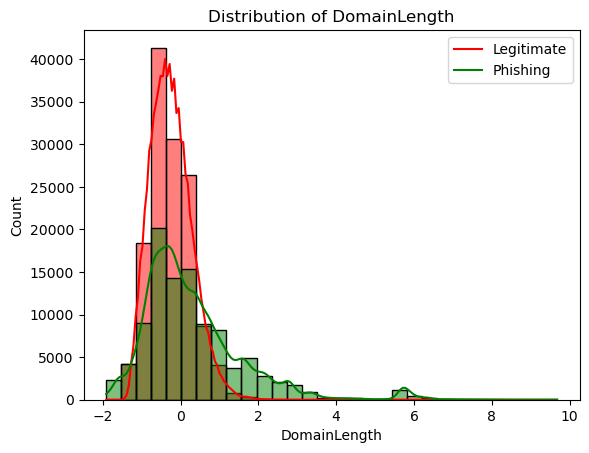

In [26]:
sns.histplot(data=df, x="DomainLength", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"DomainLength"}")
plt.xlabel("DomainLength")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

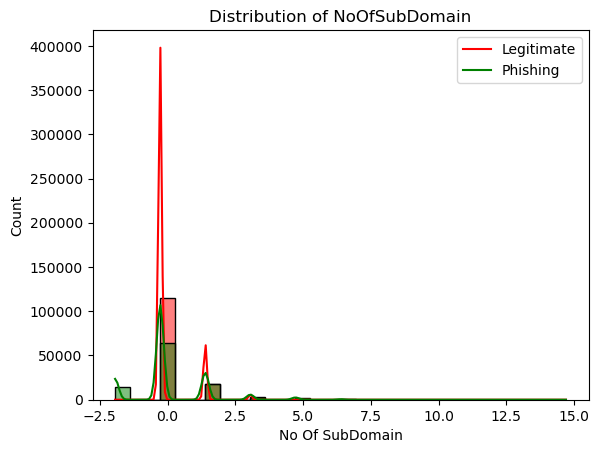

In [27]:
sns.histplot(data=df, x="NoOfSubDomain", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"NoOfSubDomain"}")
plt.xlabel("No Of SubDomain")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

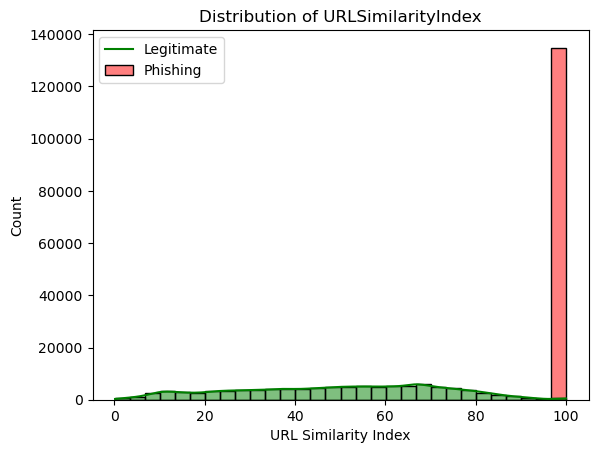

In [28]:
sns.histplot(data=phishing_ds, x="URLSimilarityIndex", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"URLSimilarityIndex"}")
plt.xlabel("URL Similarity Index")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

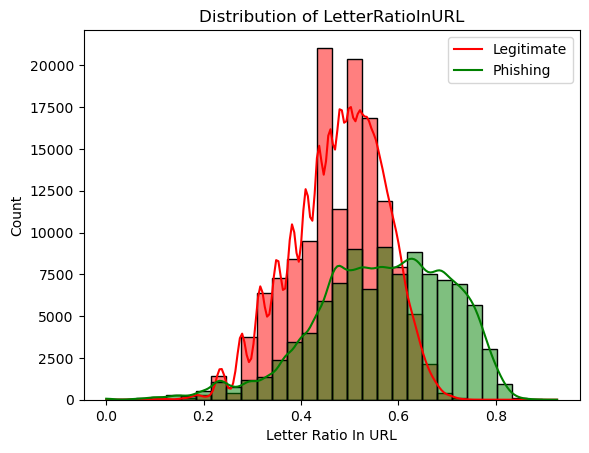

In [29]:
sns.histplot(data=phishing_ds, x="LetterRatioInURL", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"LetterRatioInURL"}")
plt.xlabel("Letter Ratio In URL")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

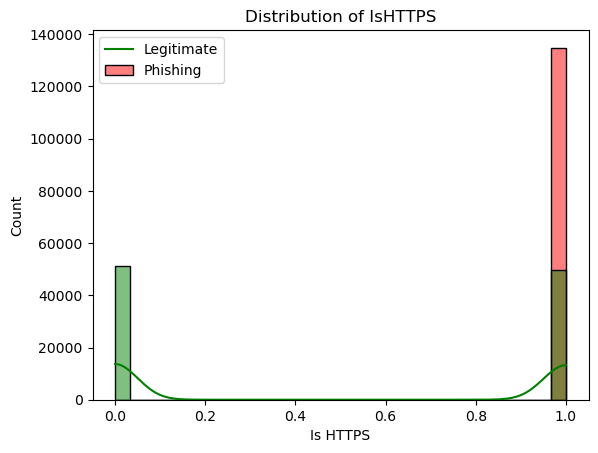

In [30]:
sns.histplot(data=phishing_ds, x="IsHTTPS", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"IsHTTPS"}")
plt.xlabel("Is HTTPS")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

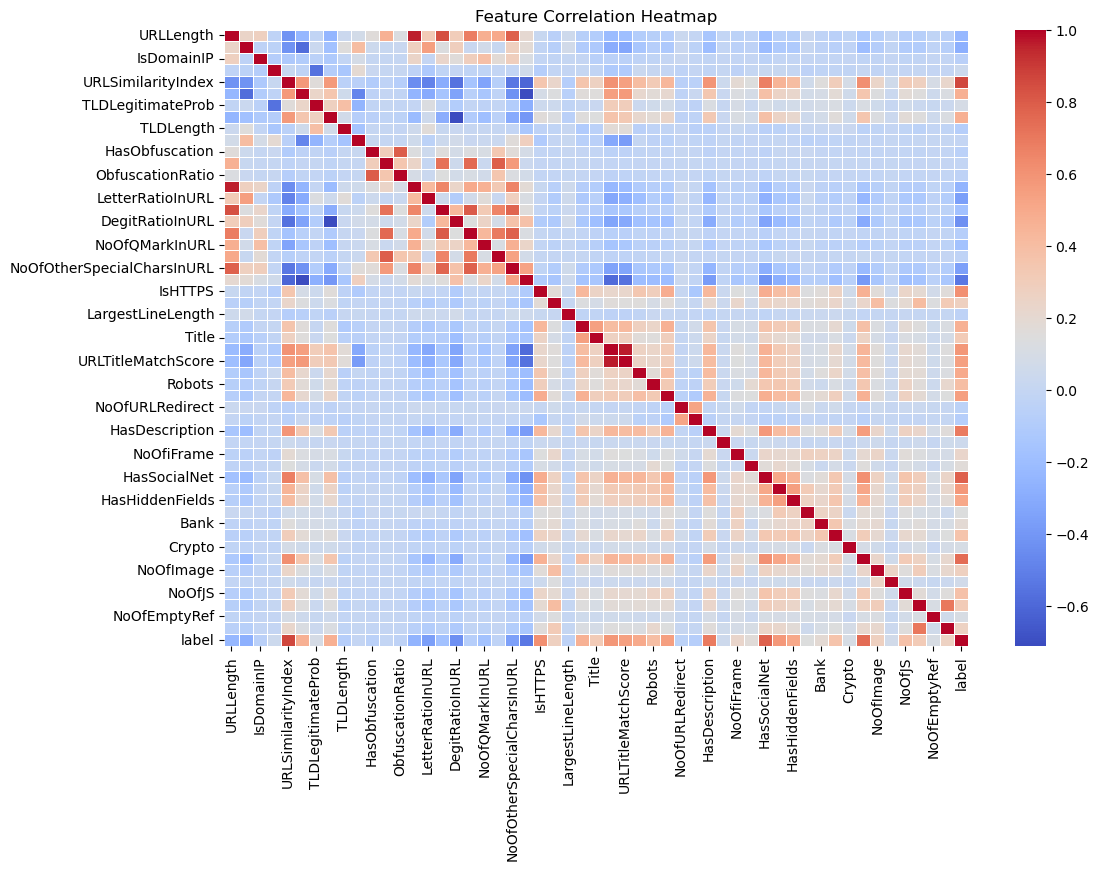

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

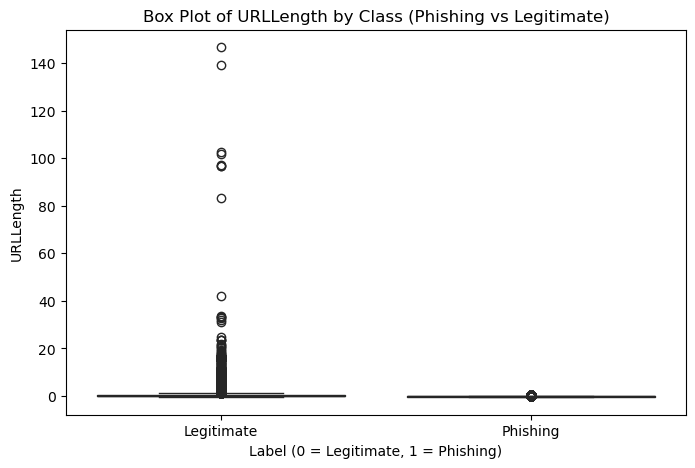

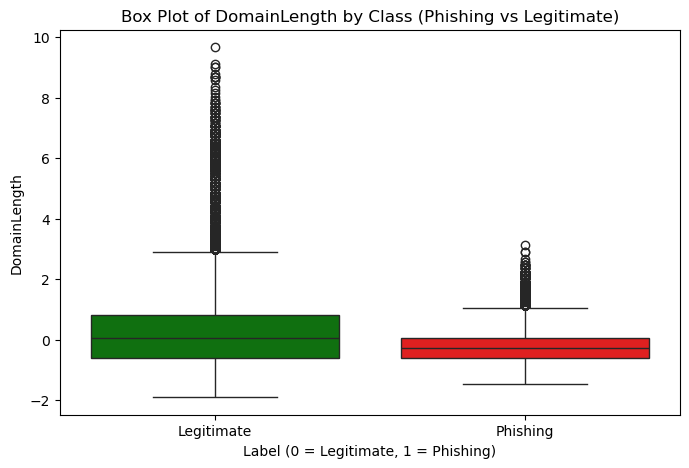

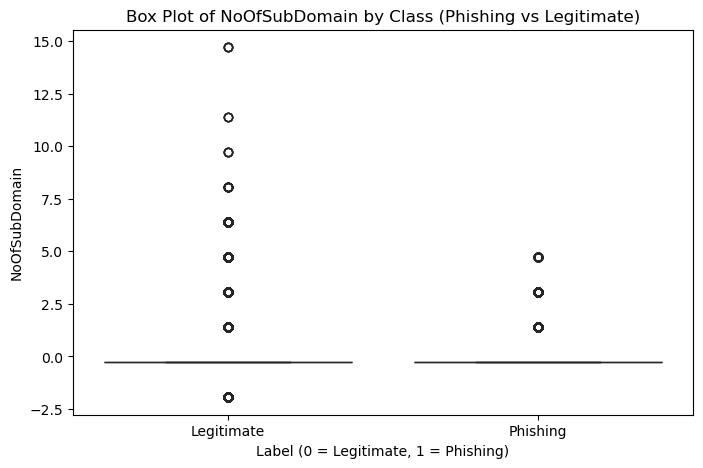

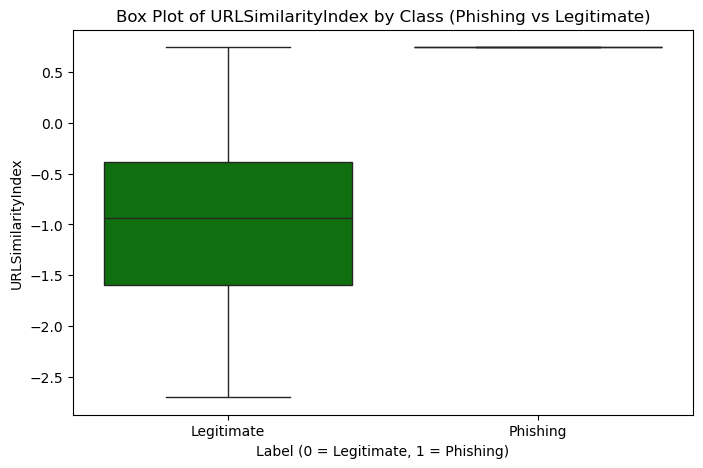

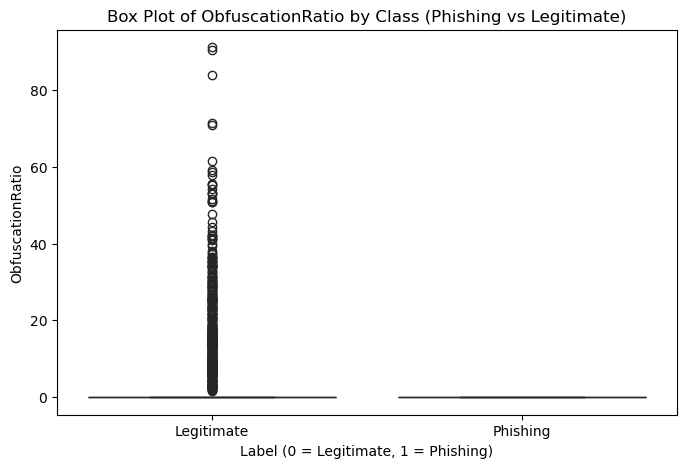

In [32]:
# Box Plots: Outlier Detection in Numerical Features
features_box = ["URLLength", "DomainLength", "NoOfSubDomain", "URLSimilarityIndex", "ObfuscationRatio"]
for f in features_box:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["label"], y=df[f], palette=["green", "red"])
    plt.title(f"Box Plot of {f} by Class (Phishing vs Legitimate)")
    plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
    plt.ylabel(f)
    plt.xticks(ticks=[0, 1], labels=["Legitimate", "Phishing"])
    plt.show()
    print("\n")

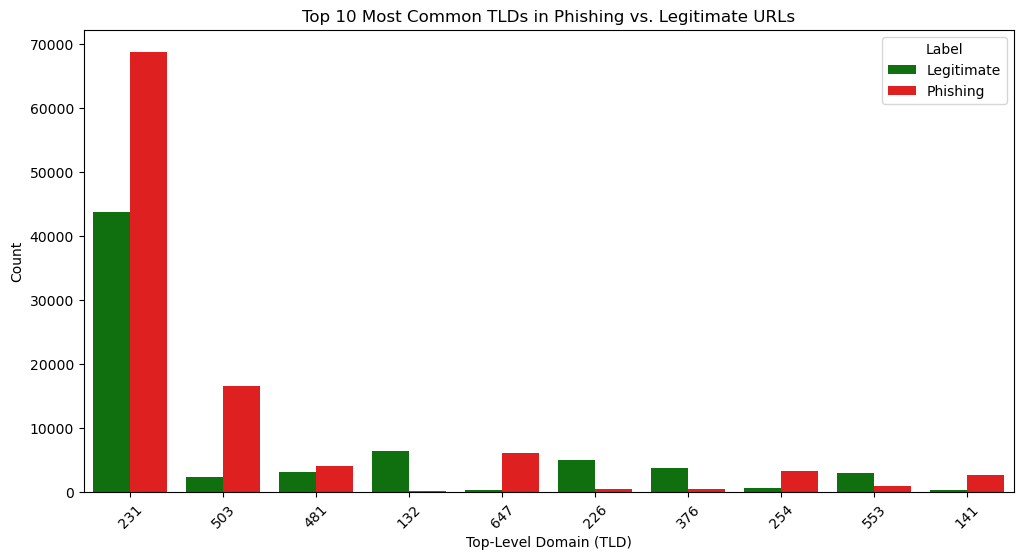

In [33]:
# Count Plot: Distribution of Categorical Features
plt.figure(figsize=(12, 6))
sns.countplot(x=df["TLD"], hue=df["label"], palette=["green", "red"], order=df["TLD"].value_counts().index[:10])
plt.title("Top 10 Most Common TLDs in Phishing vs. Legitimate URLs")
plt.xlabel("Top-Level Domain (TLD)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

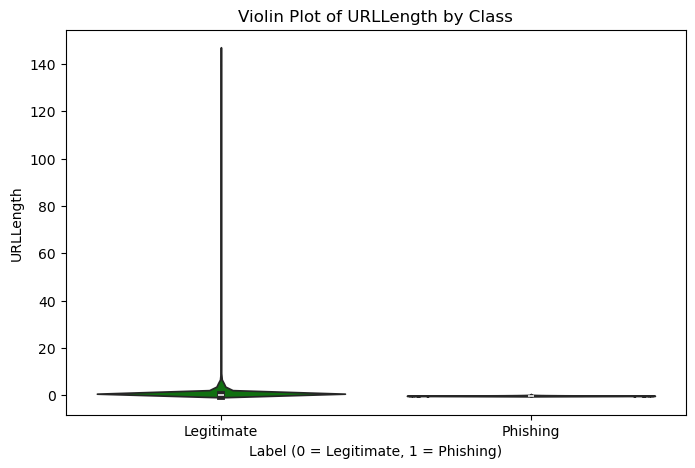

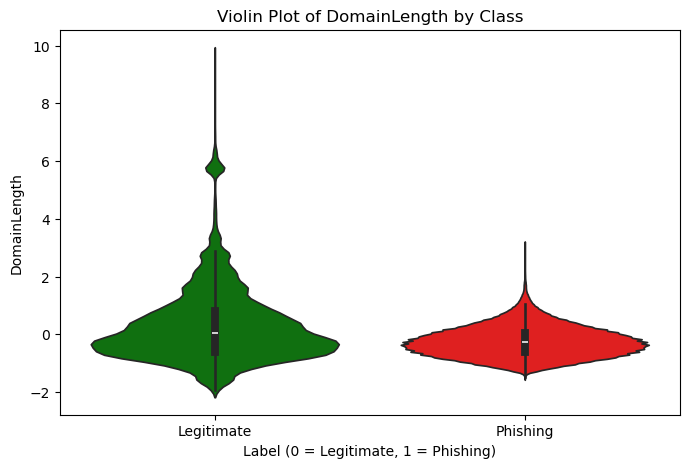

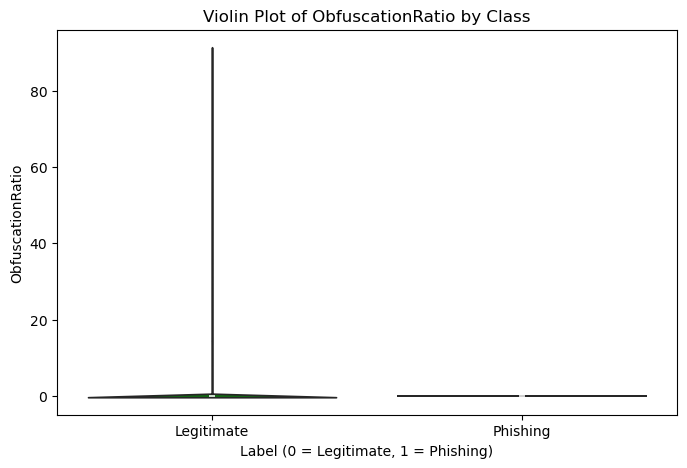

In [34]:
#Violin Plots: Feature Distributions per Class
for feature in ["URLLength", "DomainLength", "ObfuscationRatio"]:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=df["label"], y=df[feature], palette=["green", "red"])
    plt.title(f"Violin Plot of {feature} by Class")
    plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=["Legitimate", "Phishing"])
    plt.show()

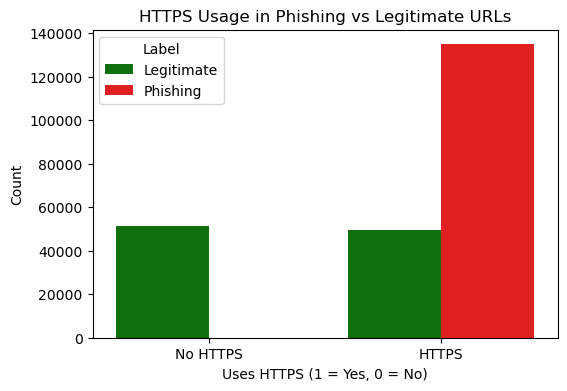

In [35]:
#HTTPS Usage in Phishing vs. Legitimate URLs
plt.figure(figsize=(6, 4))
sns.countplot(x=df["IsHTTPS"], hue=df["label"], palette=["green", "red"])
plt.title("HTTPS Usage in Phishing vs Legitimate URLs")
plt.xlabel("Uses HTTPS (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No HTTPS", "HTTPS"])
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

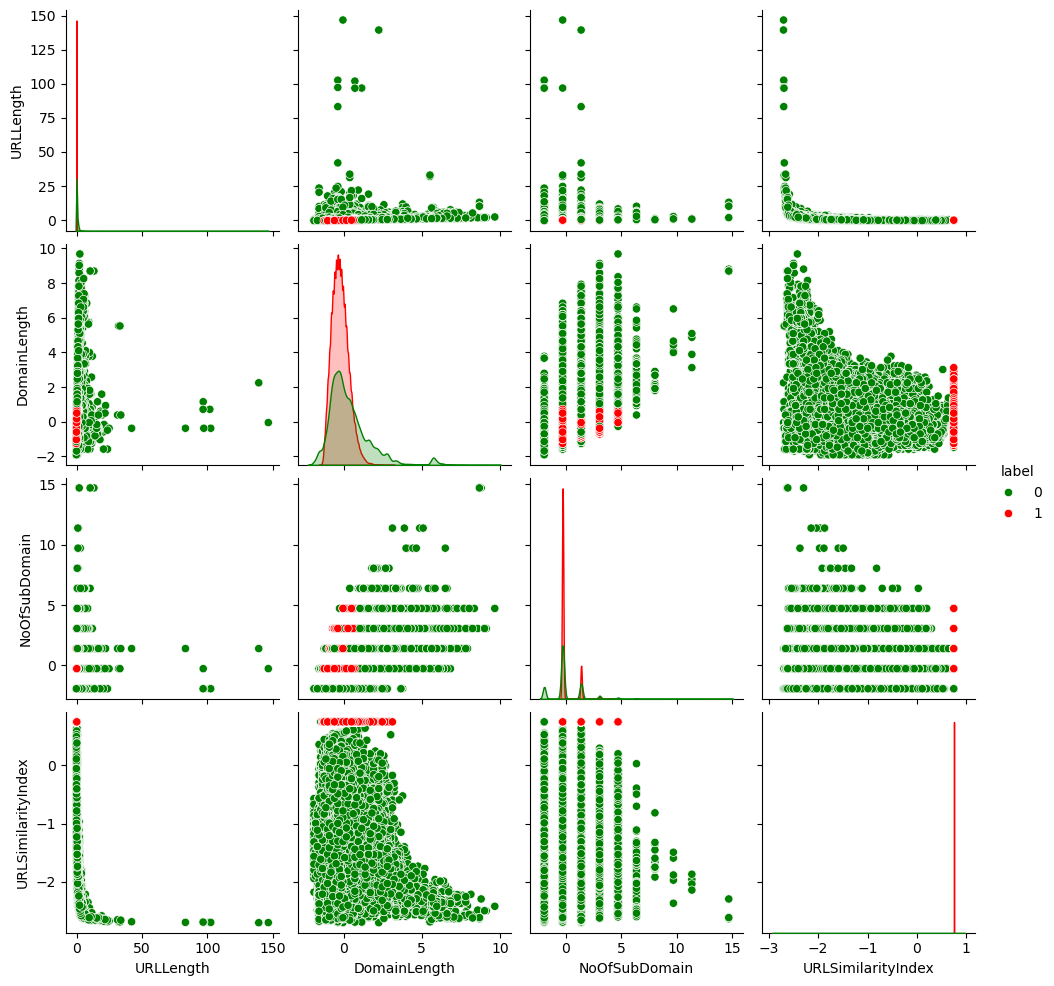

In [36]:
# Relationship Between Multiple Features
sns.pairplot(df, vars=["URLLength", "DomainLength", "NoOfSubDomain", "URLSimilarityIndex"], hue="label", palette=["green", "red"])
plt.show()

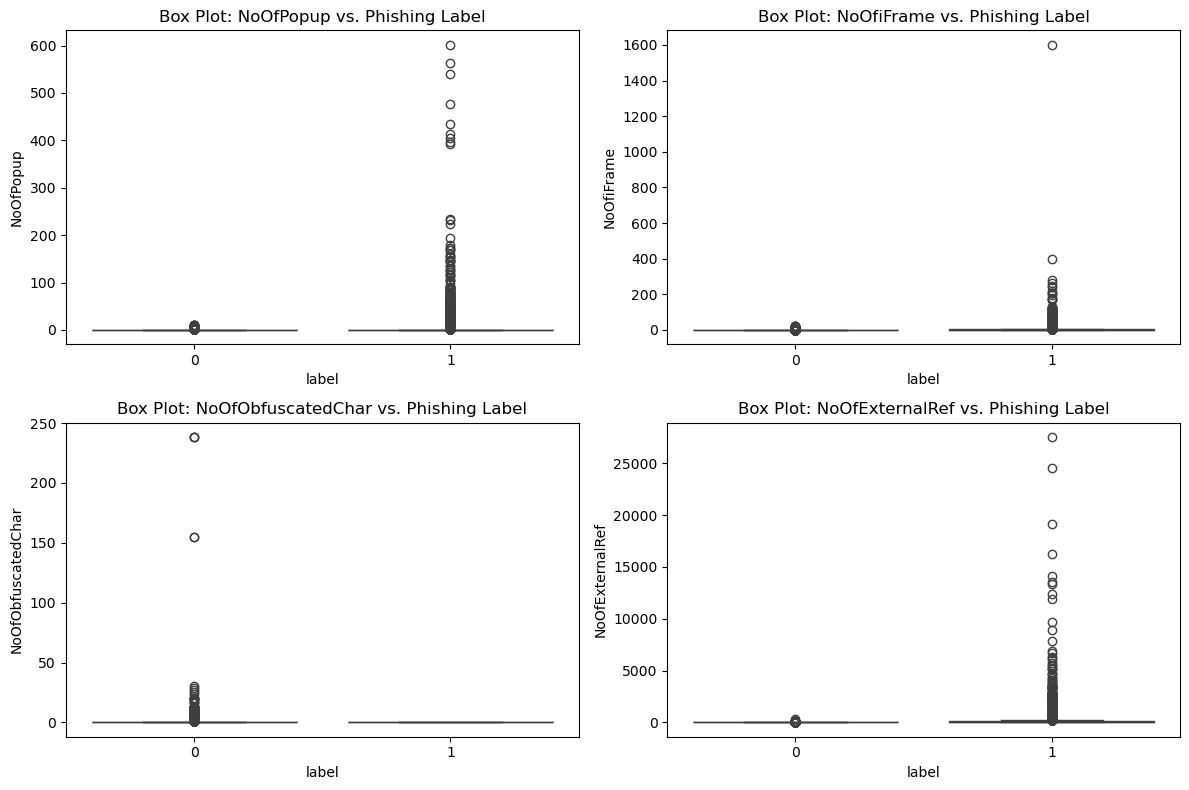

In [37]:
# Box Plots for Outliers Detection
num_features = ["NoOfPopup", "NoOfiFrame", "NoOfObfuscatedChar", "NoOfExternalRef"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["label"], y=df[feature])
    plt.title(f"Box Plot: {feature} vs. Phishing Label")

plt.tight_layout()
plt.show()

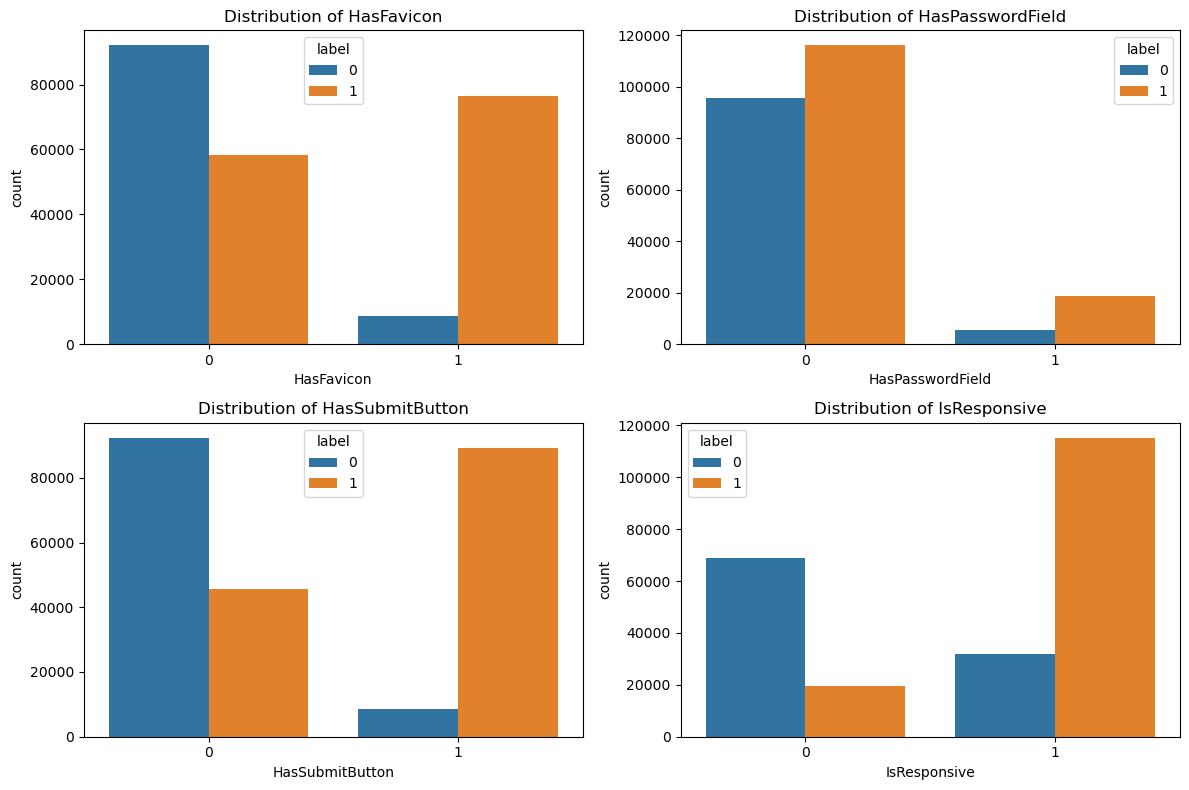

In [38]:
# Count Plot for Categorical Features
cat_features = ["HasFavicon", "HasPasswordField", "HasSubmitButton", "IsResponsive"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[feature], hue=df["label"])
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

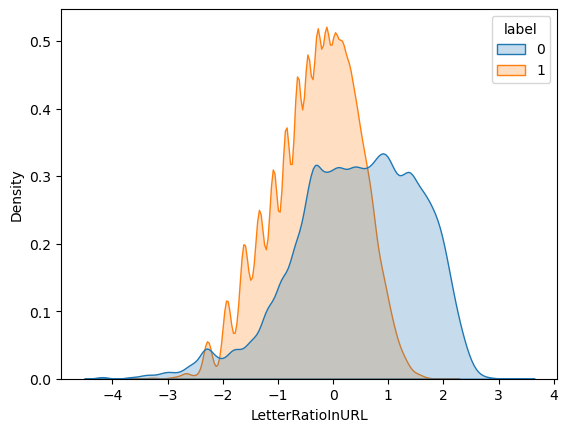

In [39]:
# KDE Plot for URL Character Ratios
sns.kdeplot(data=df, x="LetterRatioInURL", hue="label", fill=True, common_norm=False)
plt.show()

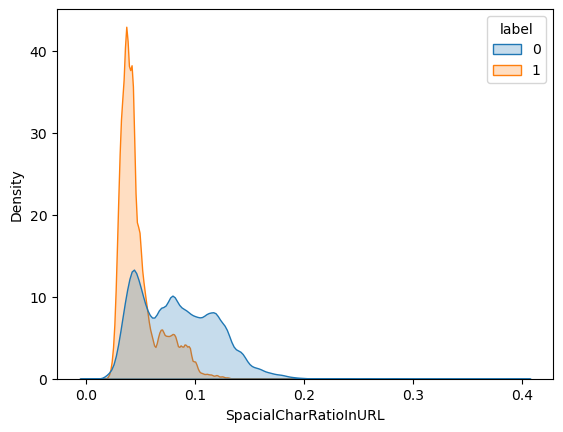

In [40]:
sns.kdeplot(data=df, x="SpacialCharRatioInURL", hue="label", fill=True, common_norm=False)
plt.show()

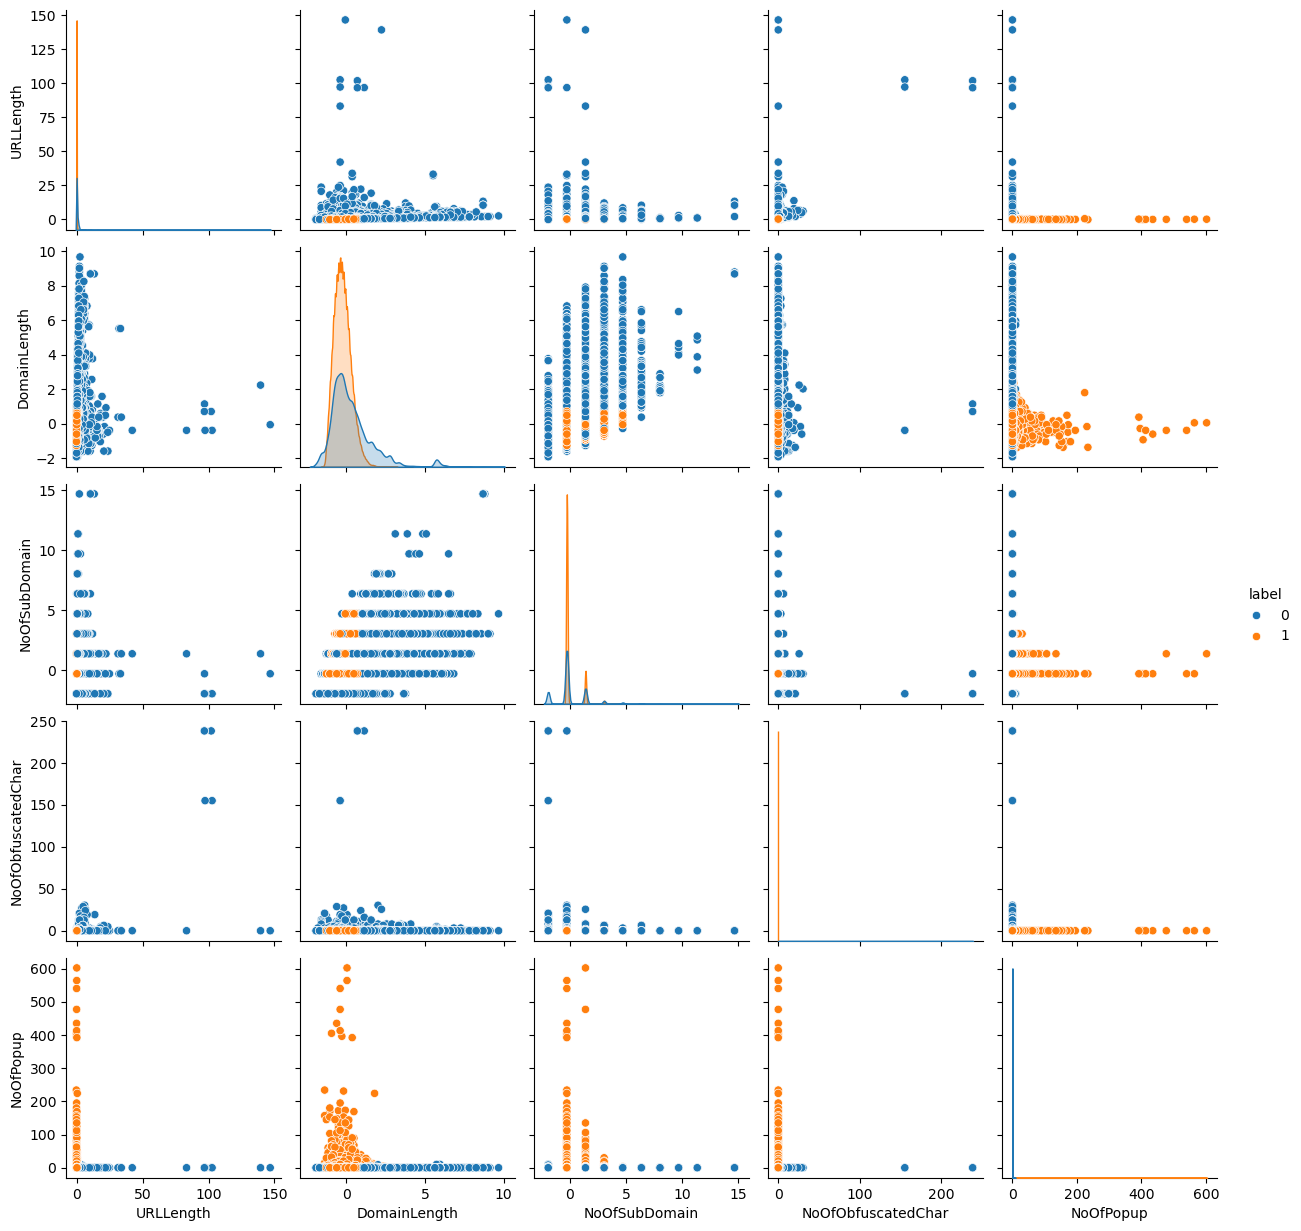

In [41]:
# Pairwise Correlation of Important Features
selected_features = ["URLLength", "DomainLength", "NoOfSubDomain", "NoOfObfuscatedChar", "NoOfPopup", "label"]
sns.pairplot(df[selected_features], hue="label")
plt.show()

# Handling Outliers

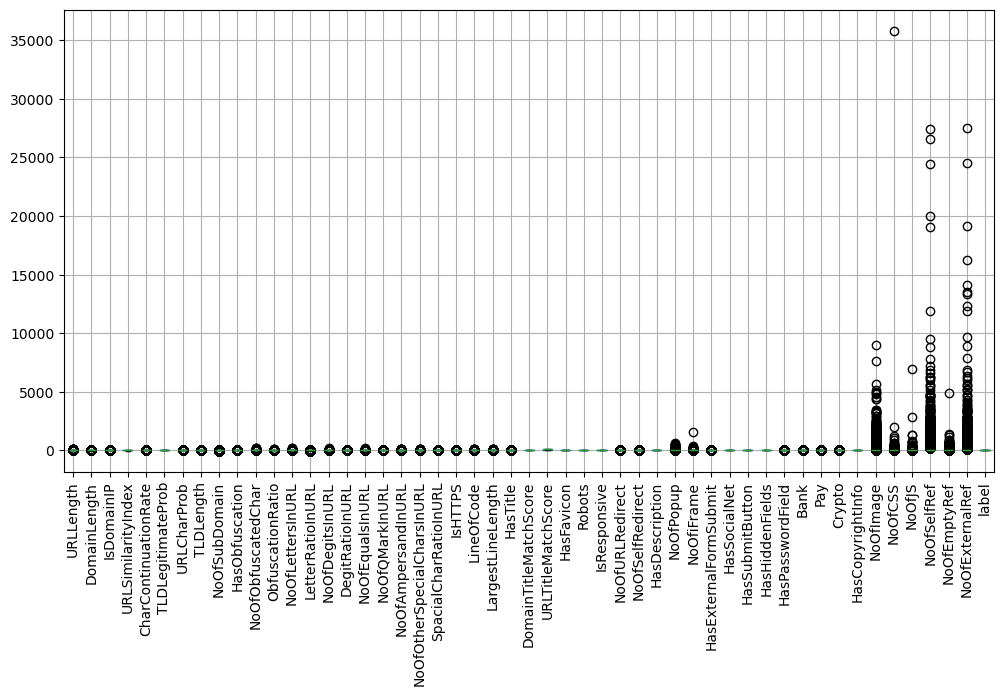

In [89]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

In [91]:
# Capping outliers replaces extreme values with upper and lower percentile limits.
def cap_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = df[column].quantile(lower_percentile)
    upper_limit = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
for col in numeric_cols:
    cap_outliers(df, col)

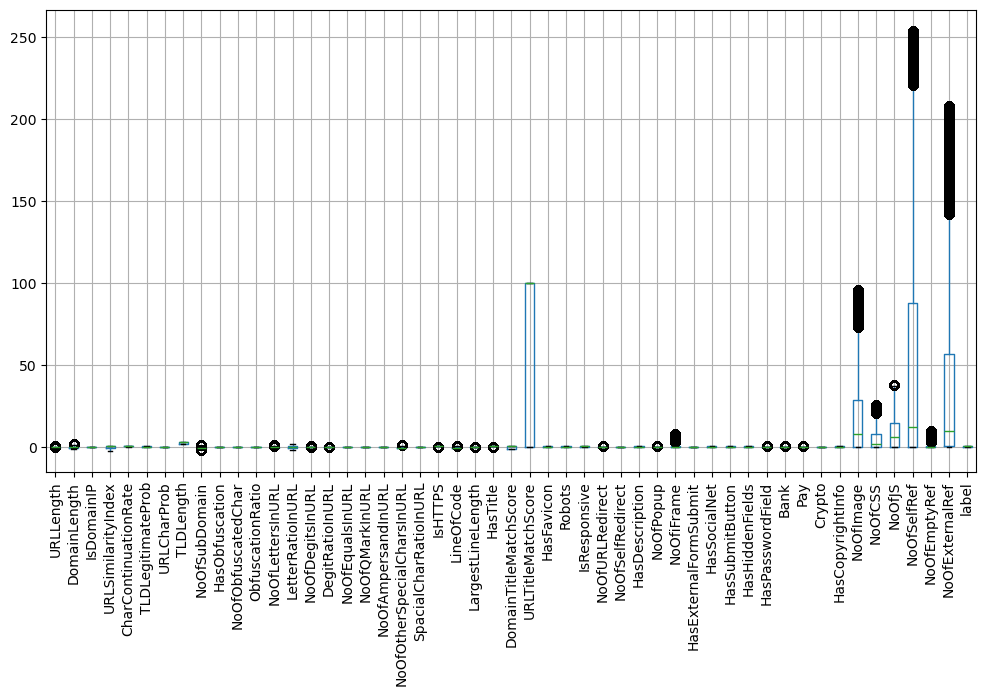

In [93]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

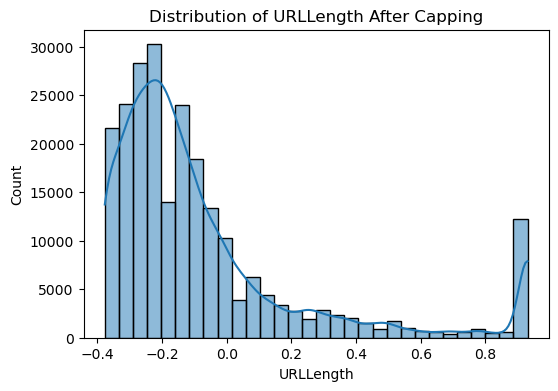

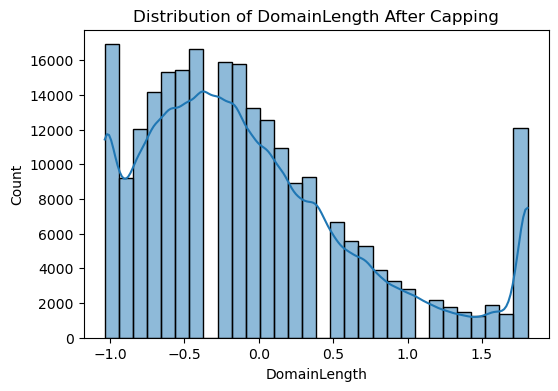

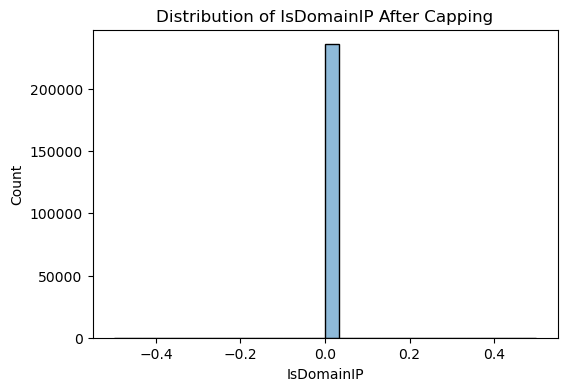

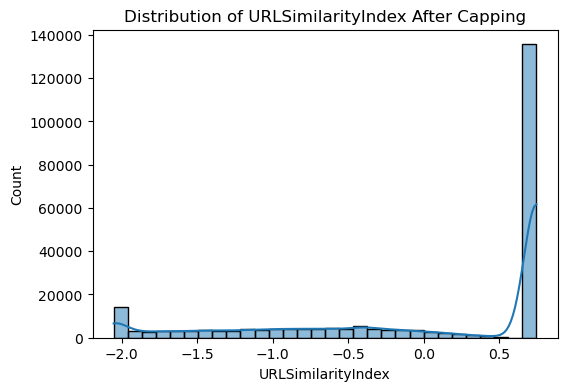

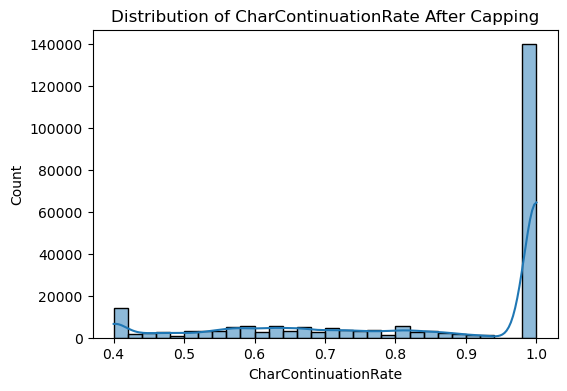

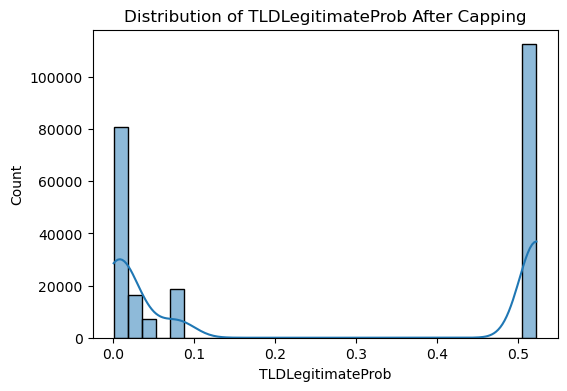

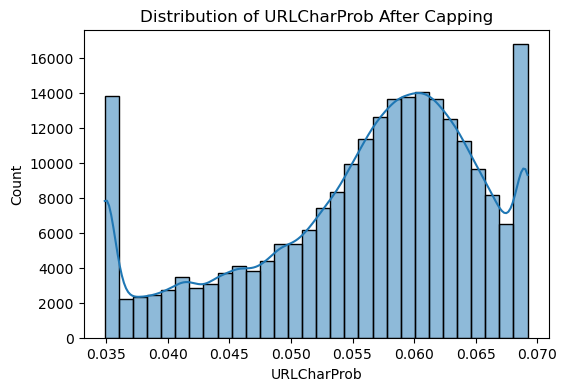

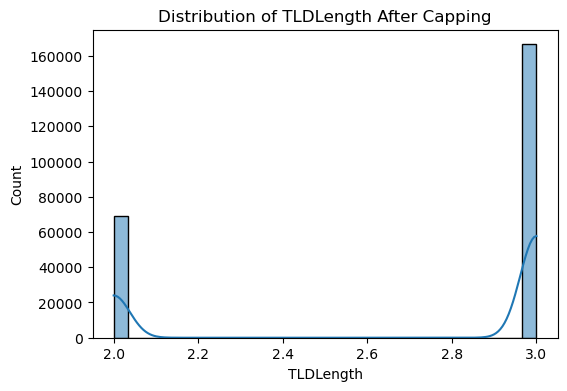

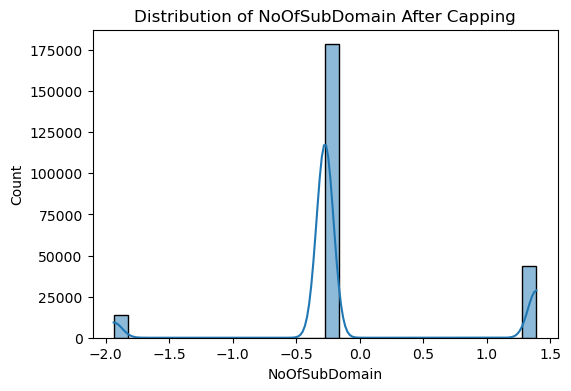

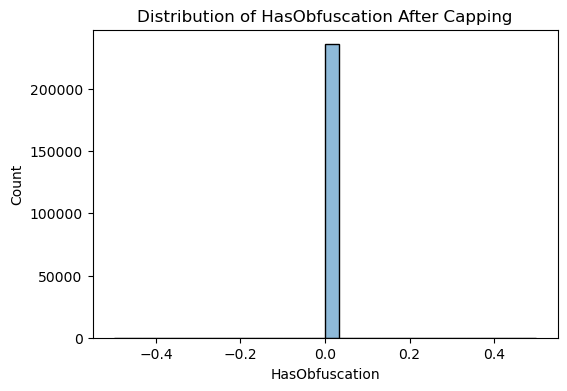

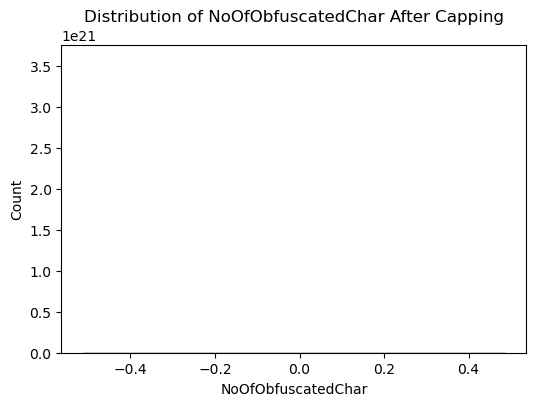

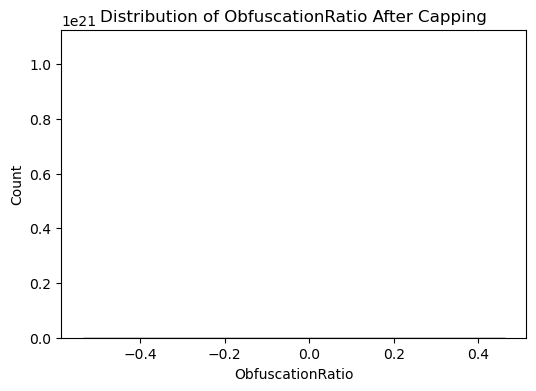

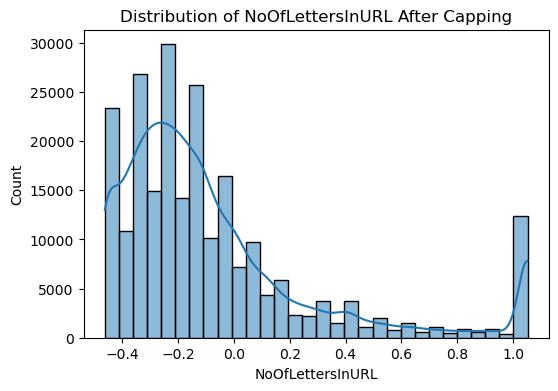

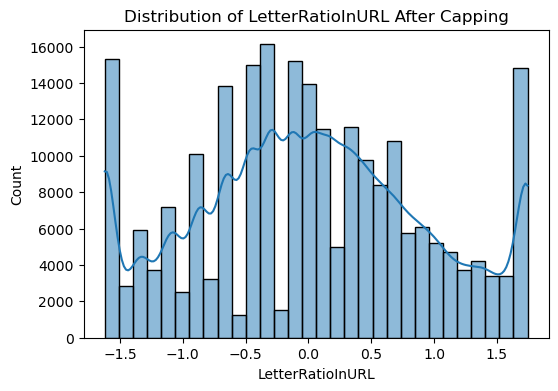

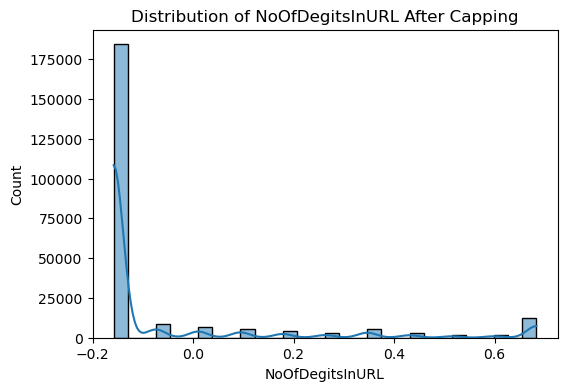

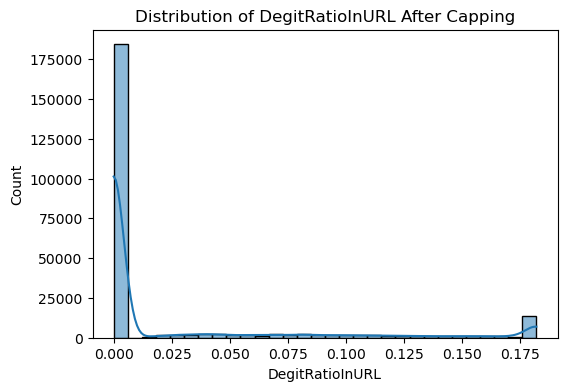

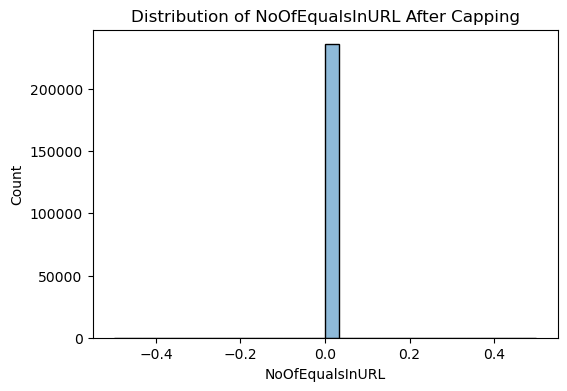

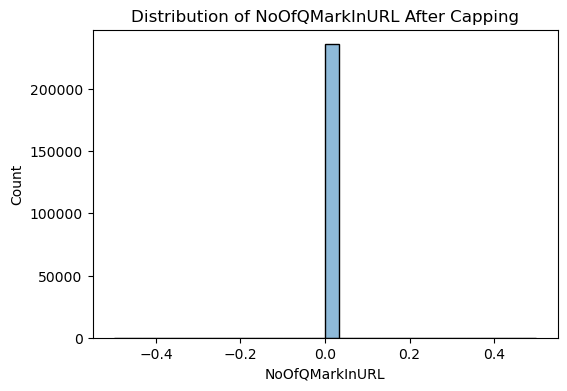

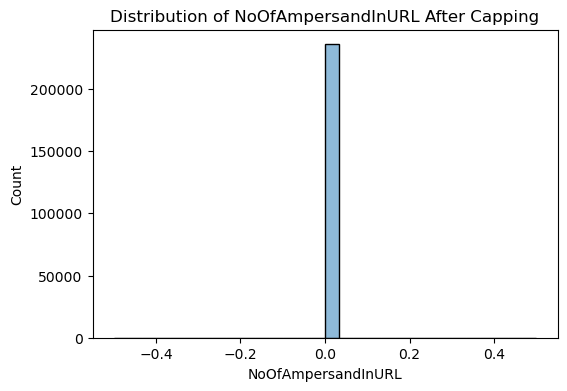

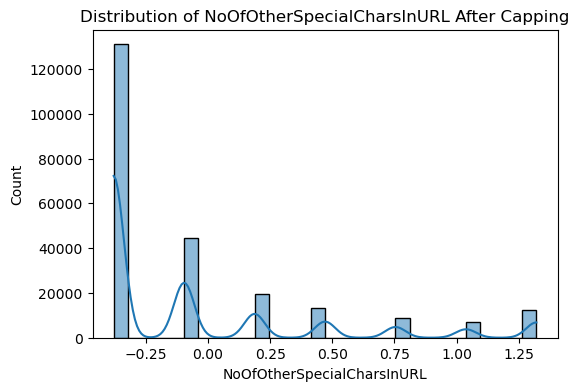

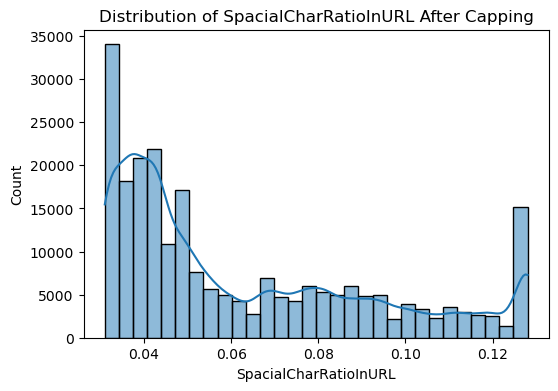

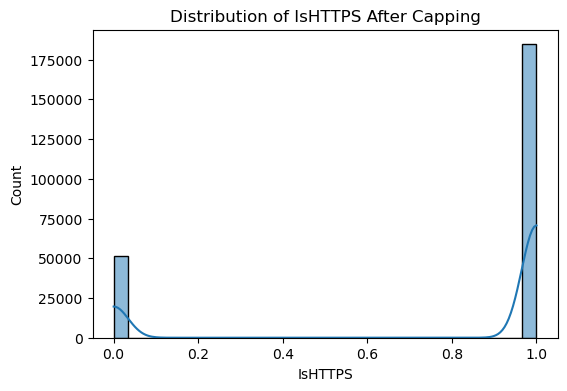

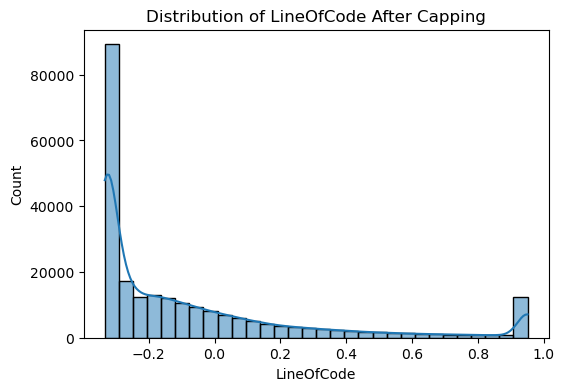

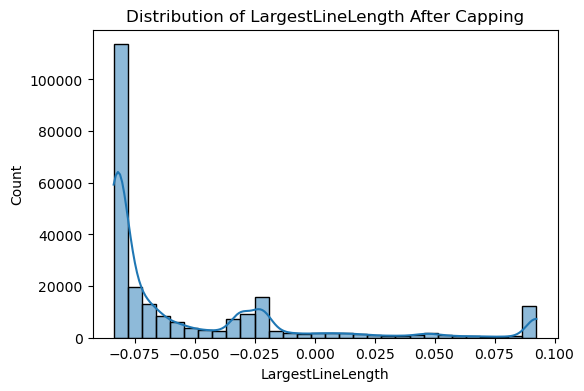

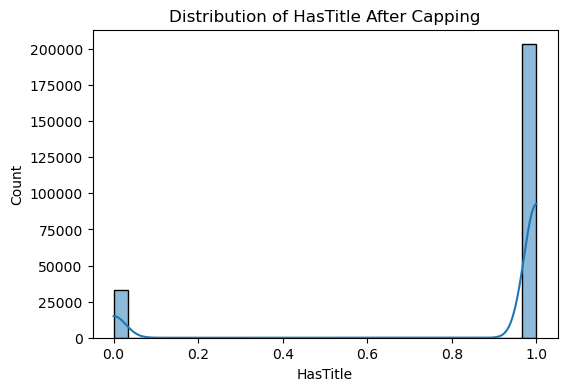

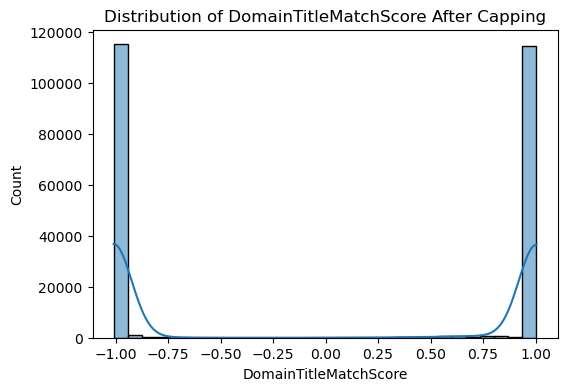

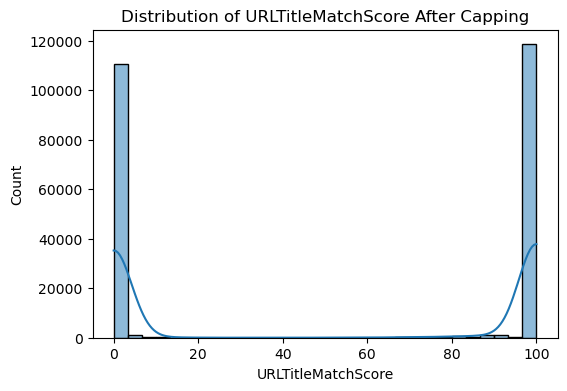

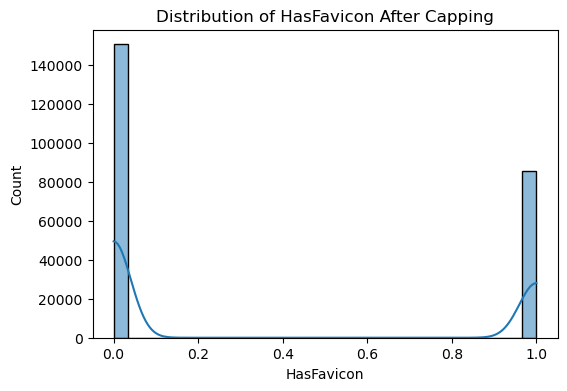

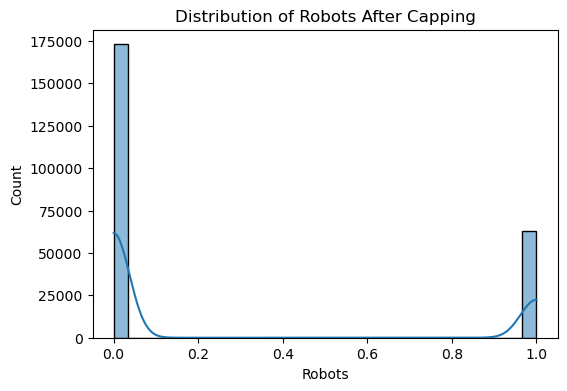

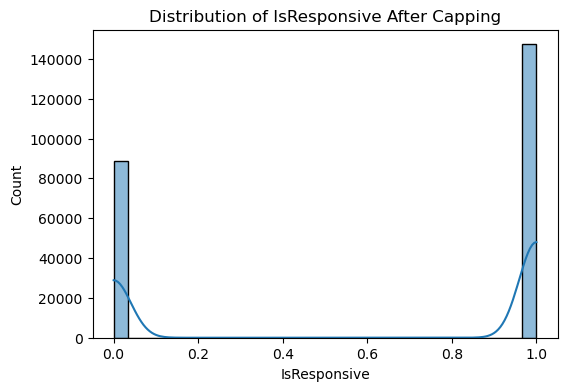

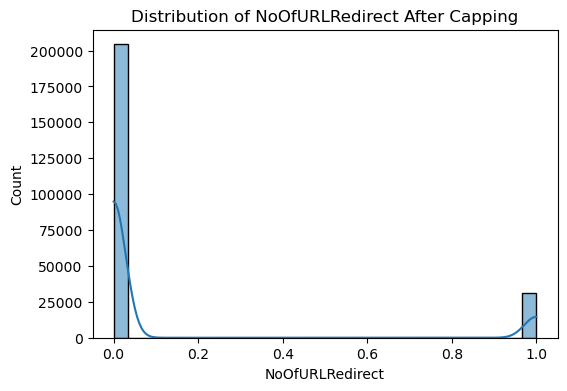

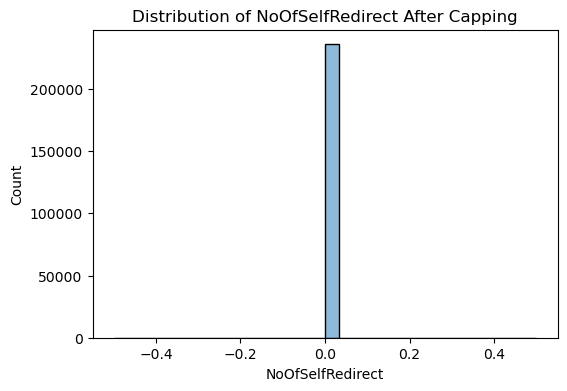

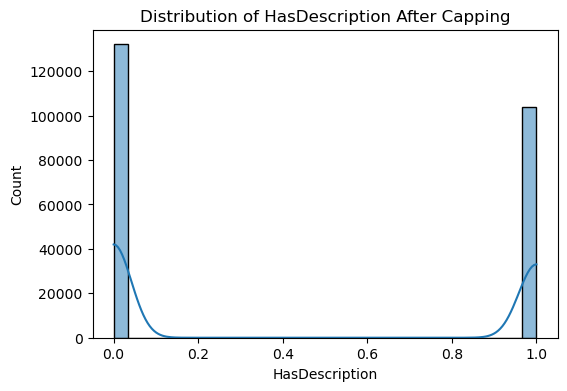

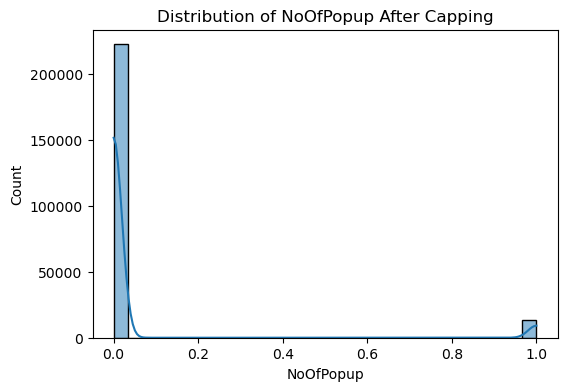

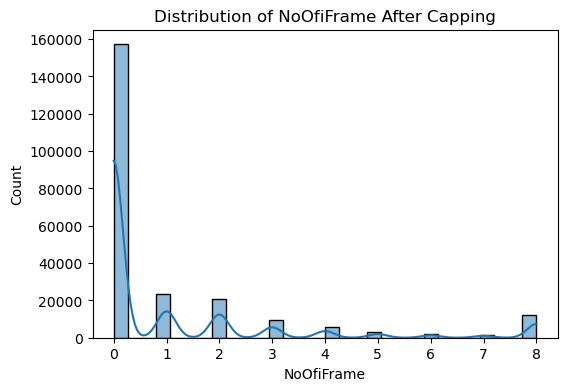

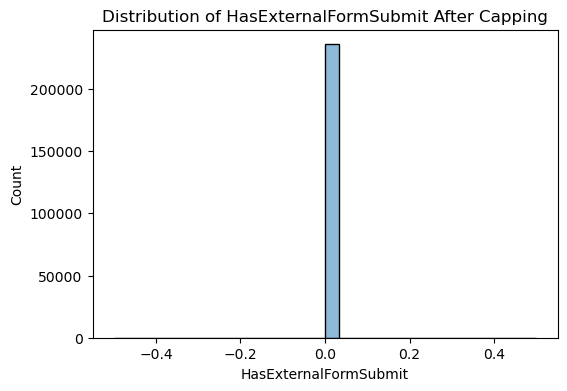

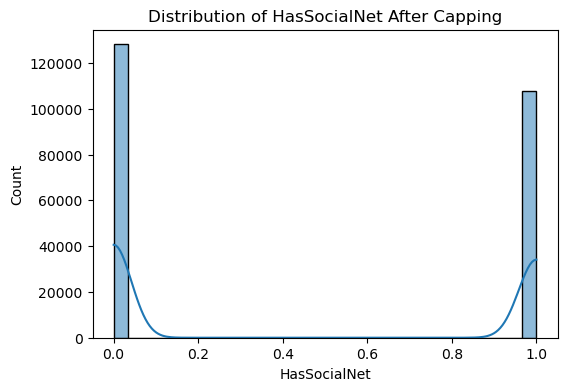

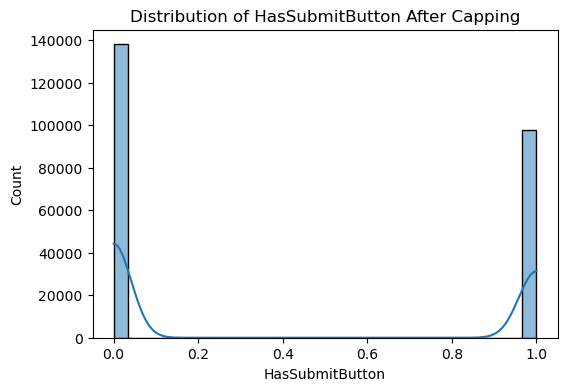

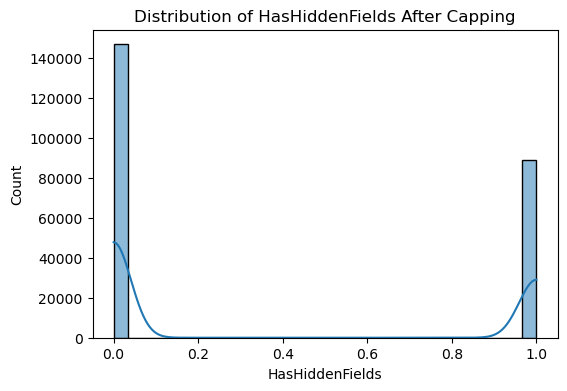

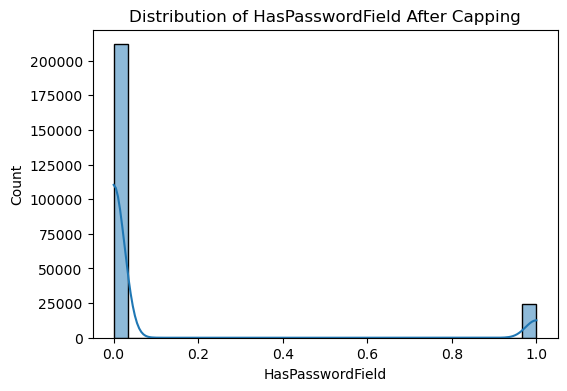

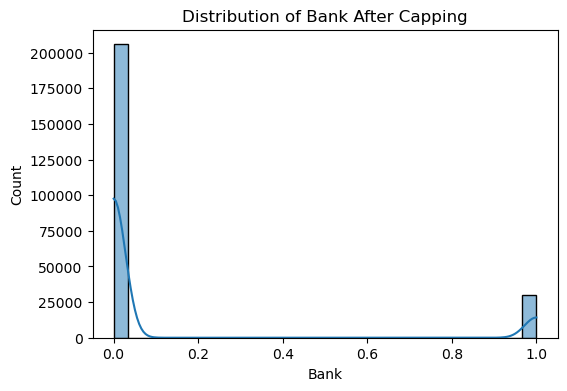

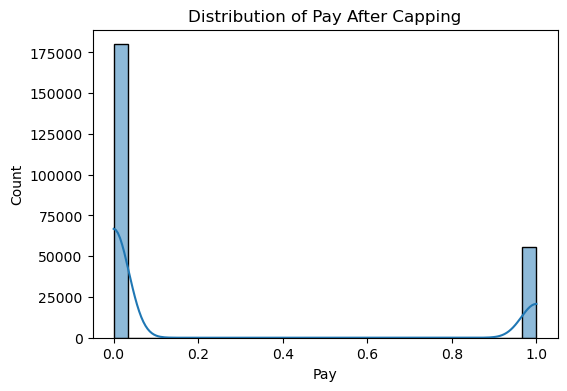

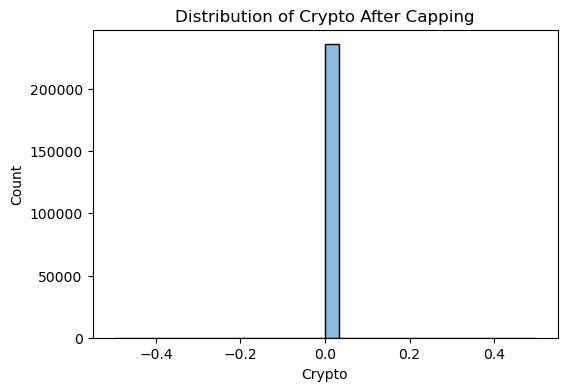

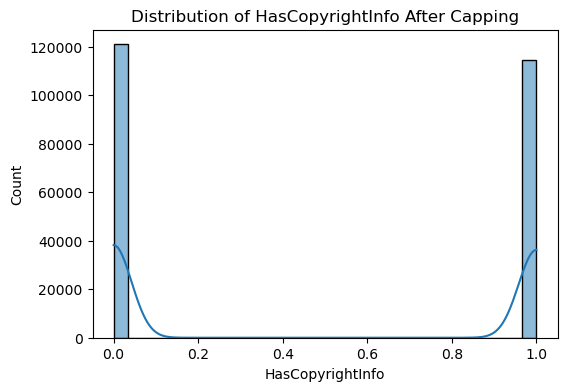

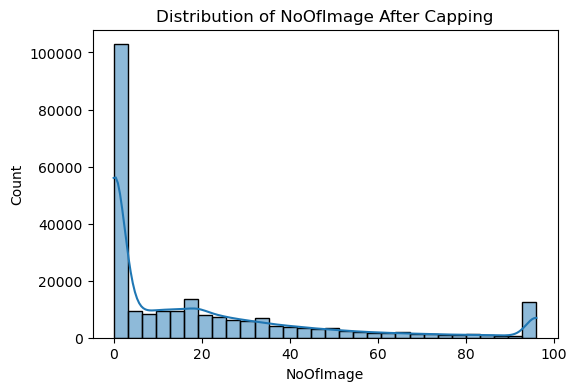

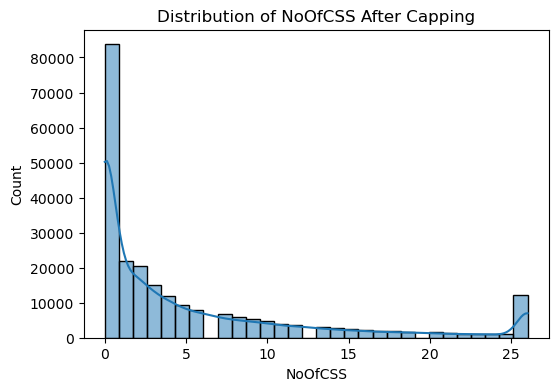

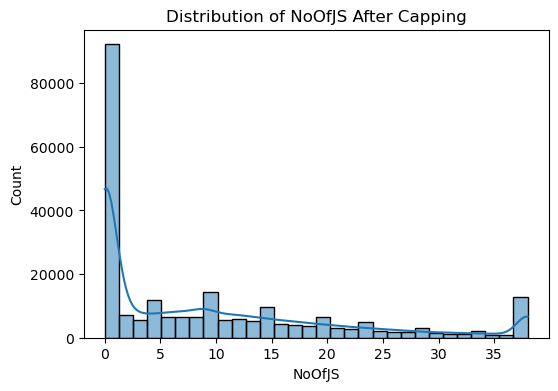

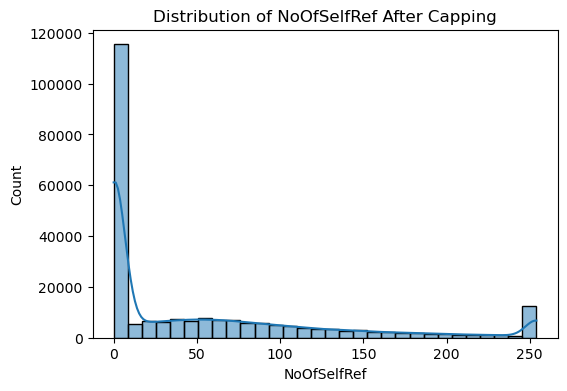

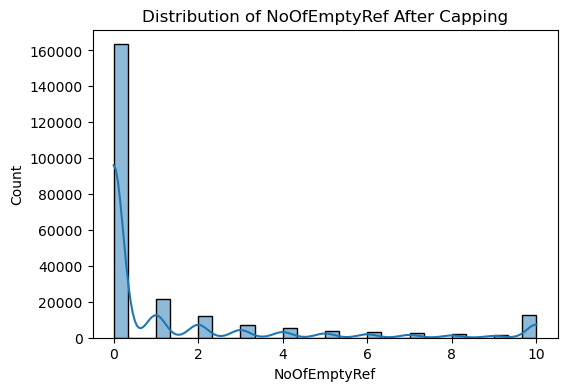

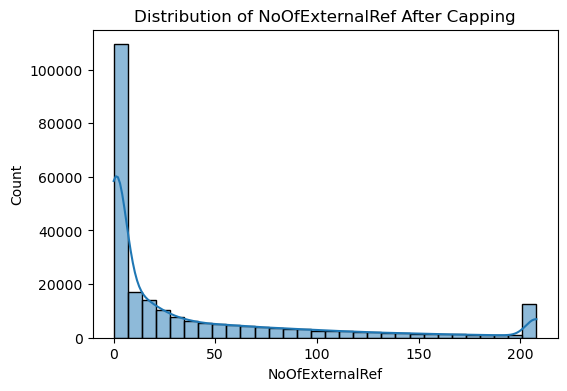

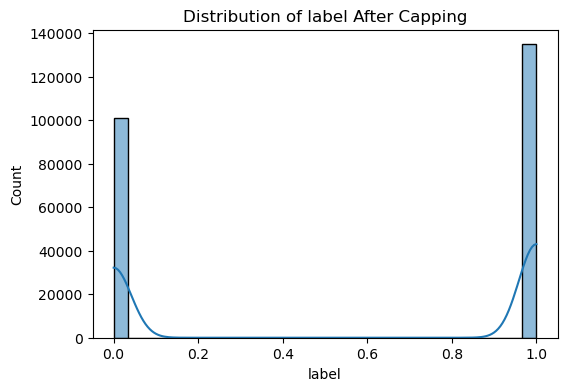

In [100]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} After Capping")
    plt.show()